# Imports

In [139]:
from tqdm import tqdm
import KSAT_properties
import importlib
import numpy as np
importlib.reload(KSAT_properties)
import matplotlib.pyplot as plt

# Percentage Solved

In [152]:
M = [200, 300, 400, 500, 600]
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m)

100%|██████████| 5/5 [00:24<00:00,  4.82s/it]


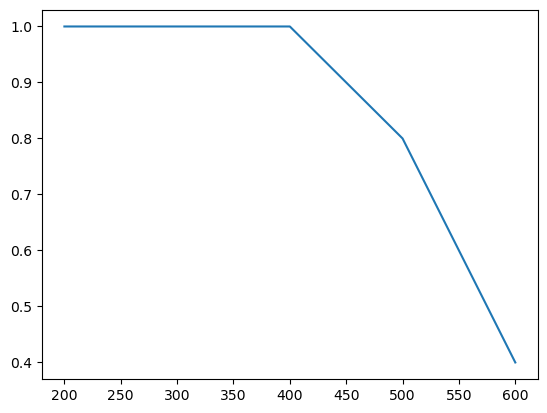

In [153]:
plt.plot(percentage_solved.keys(), percentage_solved.values())

In [80]:
percentage_solved

{200: 1.0,
 400: 0.8,
 500: 0.5333333333333333,
 600: 0.26666666666666666,
 700: 0.0,
 800: 0.0,
 900: 0.0,
 1000: 0.0}

# Algorithmic Threshold Analysis

In [93]:
from scipy.optimize import minimize_scalar
N = [200,300,400,500,600]
M_alg = {}
def loss_function(M, n):
    M = int(round(M))
    return abs(0.5 - KSAT_properties.empirical_probability(M, n))
for n in tqdm(N):
    res = minimize_scalar(lambda M: loss_function(M, n), bounds=(100, 1000), method='bounded')
    M_alg[n] = res.x

  0%|          | 0/5 [01:27<?, ?it/s]


KeyboardInterrupt: 

In [96]:
for n in tqdm(N):
    mid_M = KSAT_properties.find_threshold(n, target_prob=0.5, min_M=100, max_M=1000)
    M_alg[n] = mid_M

  0%|          | 0/5 [00:00<?, ?it/s]

0.7333333333333333 550
0.0 775
0.3333333333333333 662


 20%|██        | 1/5 [00:31<02:04, 31.23s/it]

0.4666666666666667 606
0.9666666666666667 550


 40%|████      | 2/5 [00:52<01:16, 25.44s/it]

0.5 775
0.9666666666666667 550


 60%|██████    | 3/5 [01:21<00:53, 26.82s/it]

0.4666666666666667 775
1.0 550
0.9 775
0.6333333333333333 887
0.3 943
0.4 915
0.6333333333333333 901
0.5666666666666667 908
0.43333333333333335 911


 80%|████████  | 4/5 [04:30<01:31, 91.01s/it]

0.4666666666666667 909
1.0 550
0.7 775
0.7 887
0.43333333333333335 943
0.43333333333333335 915
0.7333333333333333 901
0.6333333333333333 908


100%|██████████| 5/5 [08:02<00:00, 96.42s/it] 

0.4666666666666667 911


In [97]:
M_alg

{200: 606, 300: 775, 400: 775, 500: 909, 600: 911}

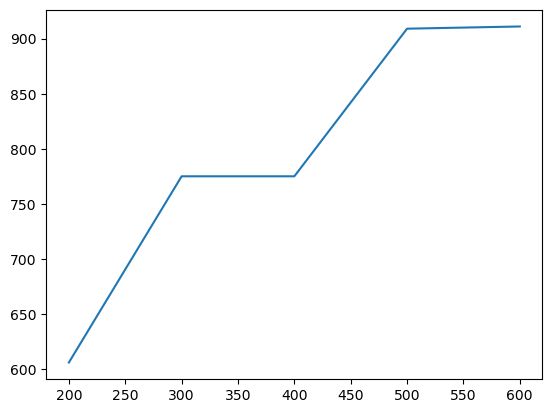

In [98]:
plt.plot(M_alg.keys(), M_alg.values())

# Curve collapse

In [118]:
probabilities = {}
for n in tqdm(N):
    probabilities[n] = KSAT_properties.empirical_probability(M = M_alg[n], N = n)


100%|██████████| 5/5 [01:25<00:00, 17.19s/it]


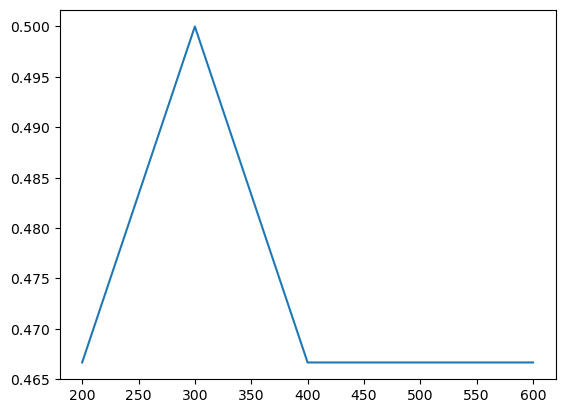

In [119]:
plt.plot(probabilities.keys(), probabilities.values())

In [145]:
N = np.array([200,300,400,500,600])
M = np.array(list(M_alg.values()))
alpha_values =  M/ N

In [147]:
alpha_values

array([3.03      , 2.58333333, 1.9375    , 1.818     , 1.51833333])

In [150]:
probabilities = {}
n = 200
for alpha in alpha_values:
    probabilities[alpha] = KSAT_properties.empirical_probability(M = int(round(alpha*n)), N = n)

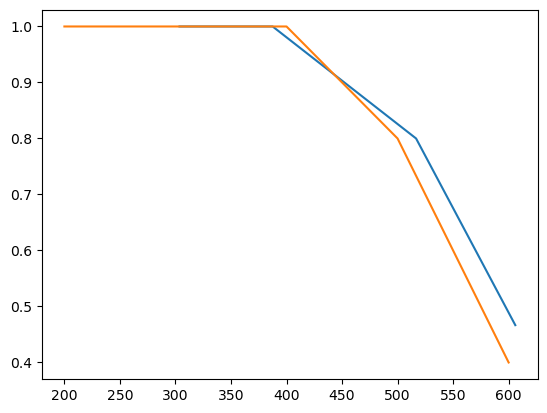

In [157]:
plt.plot(np.array(list(probabilities.keys())) * n, probabilities.values())
plt.plot(percentage_solved.keys(), percentage_solved.values())

In [154]:
probabilities

{3.03: 0.4666666666666667,
 2.5833333333333335: 0.8,
 1.9375: 1.0,
 1.818: 1.0,
 1.5183333333333333: 1.0}

/var/folders/9v/9q0jfr1s50g3gf5j556kf5ww0000gn/T/ipykernel_76870/942951451.py:6: RuntimeWarning: overflow encountered in exp
  sigmoid = 1/(1 - np.exp(50*(M_values - M)))


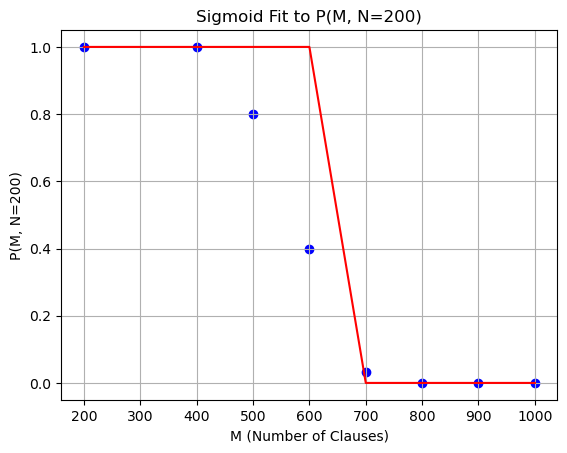

In [114]:
# Example Data: Replace these with your actual data
M_values = np.array(list(percentage_solved.keys()))  # Clause counts (M)
P_values = np.array(list(percentage_solved.values()))  # Empirical probabilities

M = M_alg[200]
sigmoid = 1/(1 - np.exp(50*(M_values - M)))

# Plot the original data and the fitted sigmoid curve
plt.scatter(M_values, P_values, color="blue")
plt.plot(M_values, sigmoid, color="red")

# Customize plot
plt.xlabel("M (Number of Clauses)")
plt.ylabel("P(M, N=200)")
plt.title("Sigmoid Fit to P(M, N=200)")
plt.grid(True)
plt.show()